# 1.02 - Preliminary Estimates for Restaurant Closings

In [1]:
import os
os.chdir('../')

In [2]:
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import re

%matplotlib inline

In [3]:
rest_df = joblib.load('data/la_rest_group_df.pkl')

In [4]:
rest_df.head()

,facility,address,city,zip_cd,num_at_address,max_seats,phone,risk_level,last_inspect_date,inspect_score,cat,closed_est,year
0,#1 CAFE,2080 CENTURY PARK E,LOS ANGELES,90067,1,30,+1nan,3,2016-08-18,90.0,None,False,2016
1,#1 CHINESE FAST FOOD,8606 S VERMONT AVE,LOS ANGELES,90044,1,30,+12132358779,3,2016-08-10,92.0,None,False,2016
2,#1 DONUT,8509 S FIGUEROA ST,LOS ANGELES,90003,2,30,+1nan,2,2016-05-17,98.0,None,False,2016
3,#1 DONUTS,8509 S FIGUEROA ST,LOS ANGELES,90003,2,30,+16266957898,2,2016-07-26,91.0,None,False,2016
5,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,90004,1,150,+13234656707,3,2016-10-12,92.0,None,False,2016


In [5]:
rest_df['last_inspect_date'] = pd.to_datetime(rest_df['last_inspect_date'], format="%m/%d/%Y")

In [6]:
rest_df['closed_est'] = rest_df['last_inspect_date'].apply(lambda x: True if x.date() 
                                                           < datetime.date(year=2015,
                                                                           month=12,
                                                                           day=31) else False)

In [7]:
rest_df['year'] = rest_df['last_inspect_date'].apply(lambda x: x.year)

In [8]:
joblib.dump(rest_df, 'data/la_rest_group_df.pkl')

['data/la_rest_group_df.pkl']

In [9]:
zip_yr_clsd = rest_df.pivot_table(index='zip_cd', 
                                   values=['closed_est', 'facility', 'inspect_score'], 
                                   aggfunc={'closed_est': 'sum', 'facility': 'count',
                                            'inspect_score': np.mean},
                                   dropna=True, margins=True, 
                                   margins_name='Total')

In [10]:
zip_yr_clsd['prct_clsd'] = zip_yr_clsd['closed_est']*1./zip_yr_clsd['facility']
zip_yr_clsd['inspect_score'] = zip_yr_clsd['inspect_score'].apply(lambda x: round(x,0))
zip_yr_clsd['closed_est'] = zip_yr_clsd['closed_est'].apply(lambda x: round(x,0))

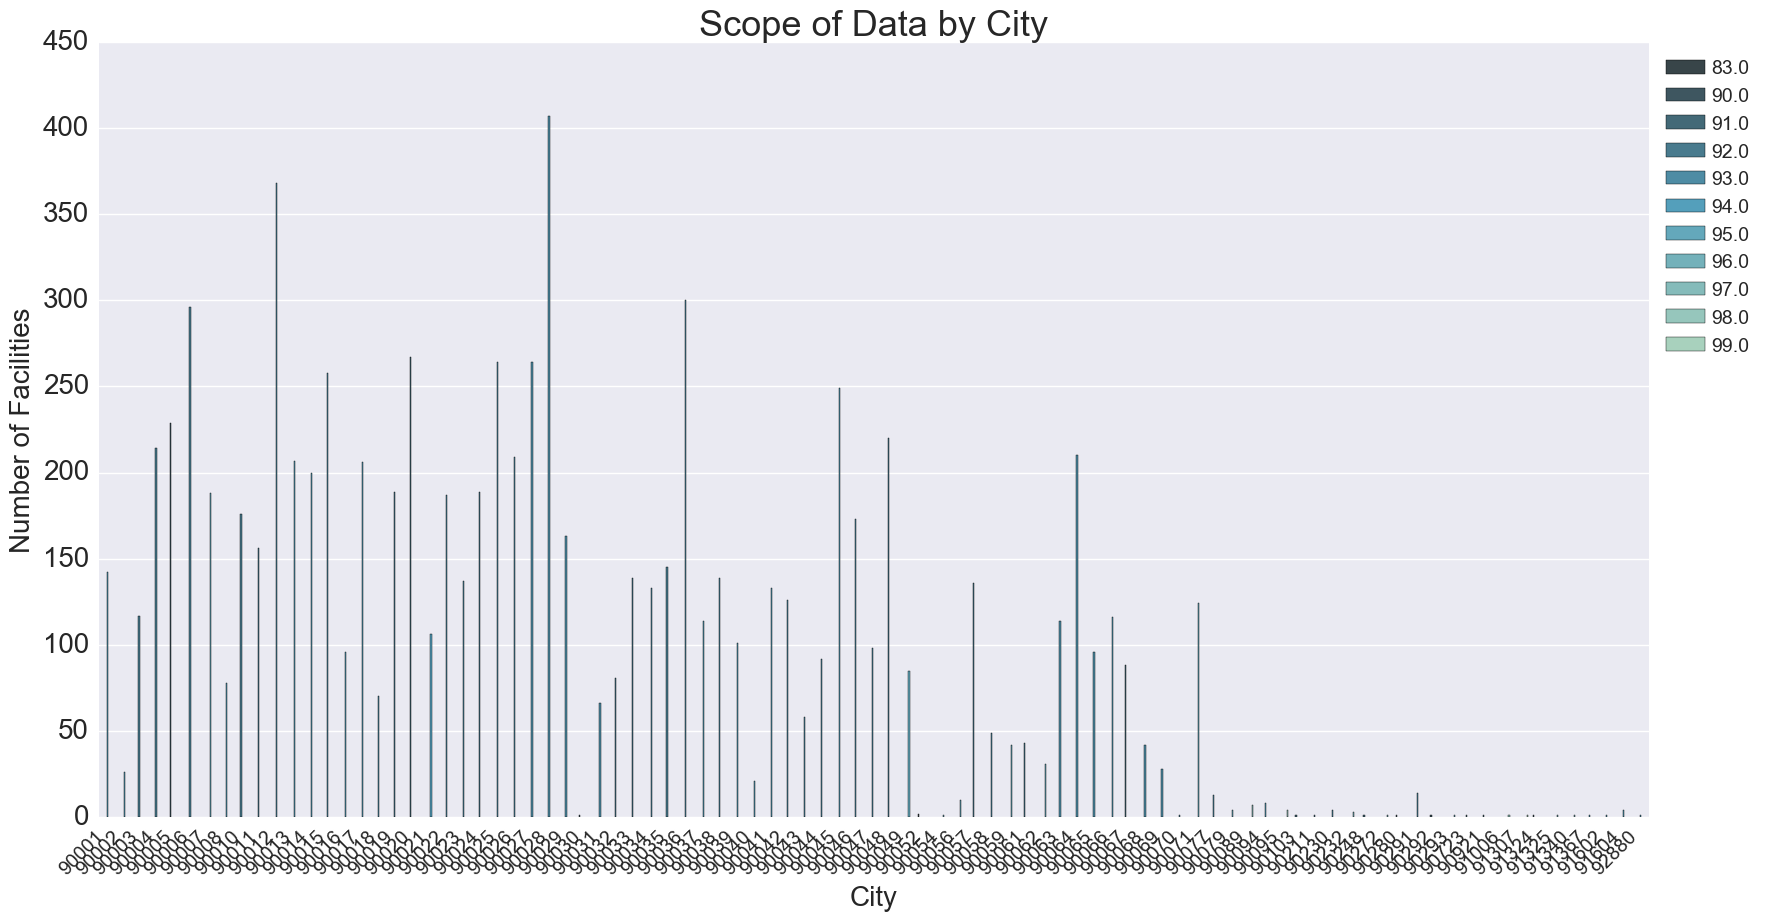

(407.0, '90028')
(368.0, '90012')
(300.0, '90036')
(296.0, '90006')
(267.0, '90020')


In [11]:
x_ = zip_yr_clsd.index.values[:-1]
y_ = zip_yr_clsd['facility'].values[:-1]
hue_ = zip_yr_clsd['inspect_score'].values[:-1]

fig = plt.figure(figsize=(20,10))

sns.barplot(x=x_, y=y_, hue=hue_, palette='GnBu_d')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.xlabel('City', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Facilities', fontsize=20)
plt.title('Scope of Data by City', fontsize=26)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, handletextpad = 0.3, fontsize=14)
plt.show()

data = zip(y_, x_)
data.sort(reverse=True)

print data[0]
print data[1]
print data[2]
print data[3]
print data[4]

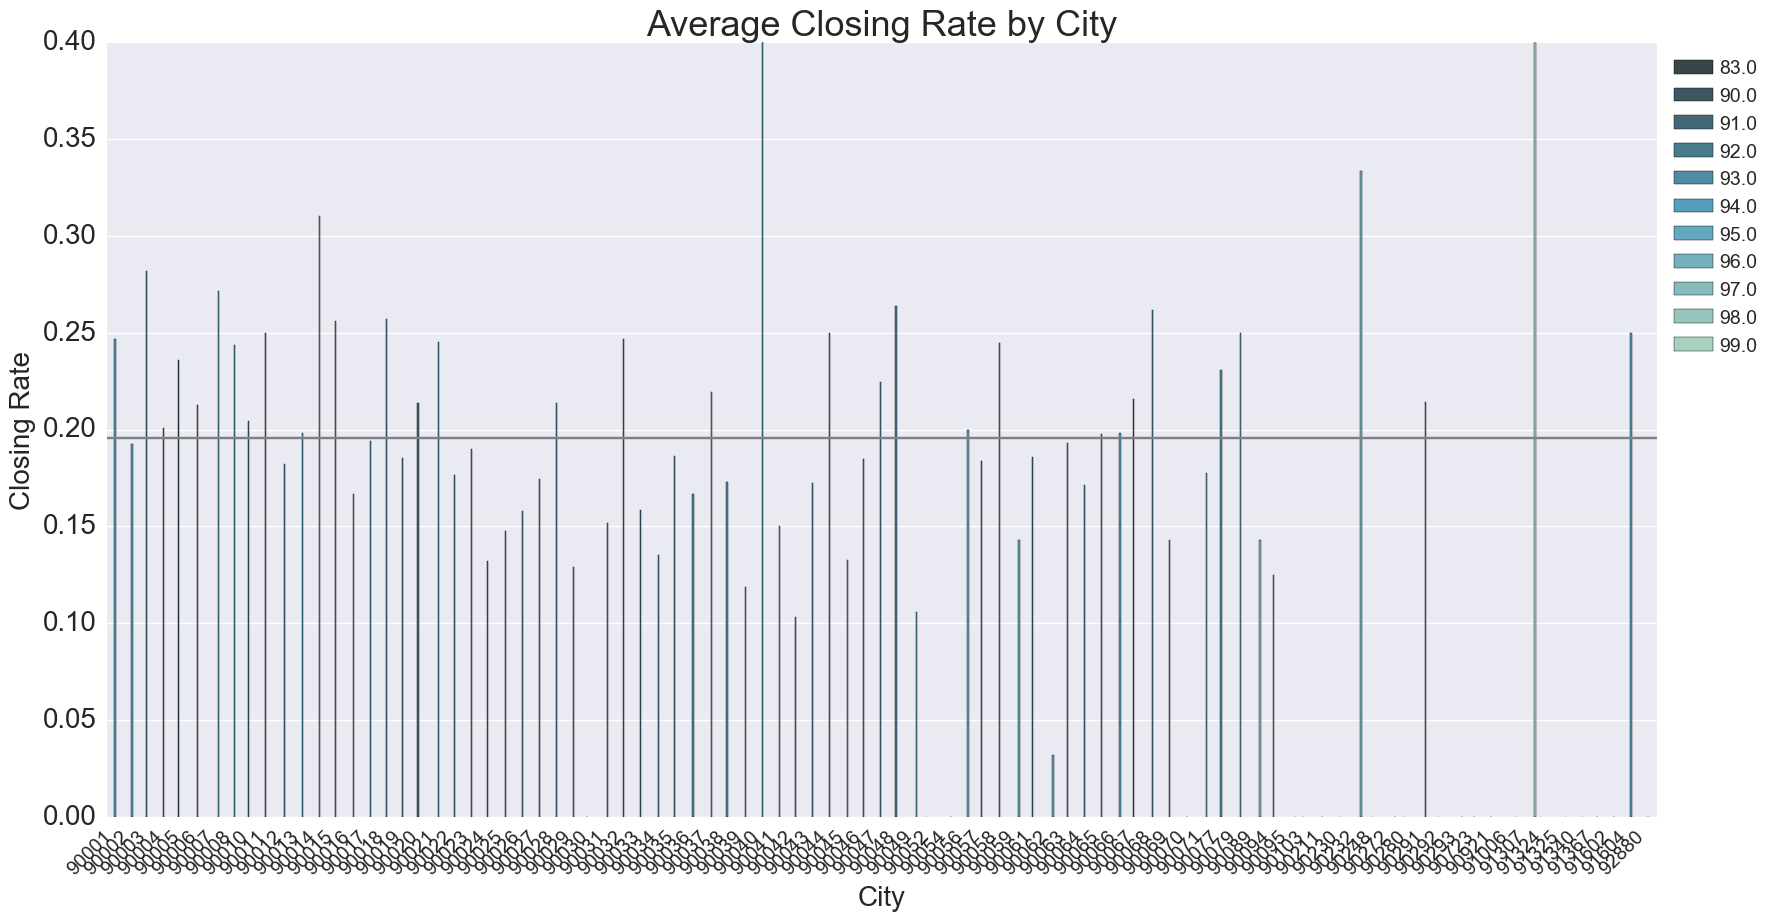

(1.0, '91307')
(0.61904761904761907, '90040')
(0.33333333333333331, '90232')
(0.31, '90014')
(0.28205128205128205, '90003')


In [12]:
x_ = zip_yr_clsd.index.values[:-1]
y_ = zip_yr_clsd['prct_clsd'].values[:-1]
hue_ = zip_yr_clsd['inspect_score'].values[:-1]
avg = zip_yr_clsd['prct_clsd'].values[-1]

fig = plt.figure(figsize=(20,10))

sns.barplot(x=x_, y=y_, hue=hue_, palette='GnBu_d')
plt.hlines(avg, -1, len(x_), colors = 'gray')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.xlabel('City', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.0, 0.4)
plt.ylabel('Closing Rate', fontsize=20)
plt.title('Average Closing Rate by City', fontsize=26)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, handletextpad = 0.3, fontsize=14)
plt.show()

data = zip(y_, x_)
data.sort(reverse=True)

print data[0]
print data[1]
print data[2]
print data[3]
print data[4]

Percentage of closings seem a bit low. I've read that 80% of restaurants don't survive their first year. I have a hunch that my data is still very noisy, and includes things that may not be restaurants. I'm hoping Yelp will fix this when I pull in their categories.